In [30]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from soilgasflux_fcs import json_reader, models, metrics
import xarray as xr



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
ds = xr.open_dataset('./output/synthetic_data62_2024-11-20.nc')
dsMC = xr.open_dataset('./output/synthetic_data62_mc_2024-11-20.nc')
ds

<xarray.Dataset> Size: 7MB
Dimensions:       (time: 1620, cutoff: 16, deadband: 6)
Coordinates:
  * time          (time) datetime64[ns] 13kB 2024-11-20T00:11:27 ... 2024-11-...
  * deadband      (deadband) int32 24B 0 10 20 30 40 50
  * cutoff        (cutoff) int32 64B 20 30 40 50 60 70 ... 130 140 150 160 170
Data variables:
    dcdt(HM)      (time, cutoff, deadband) float64 1MB ...
    dcdt(linear)  (time, cutoff, deadband) float64 1MB ...
    AIC(HM)       (time, cutoff, deadband) float64 1MB ...
    AIC(linear)   (time, cutoff, deadband) float64 1MB ...
    RMSE(HM)      (time, cutoff, deadband) float64 1MB ...
    RMSE(linear)  (time, cutoff, deadband) float64 1MB ...

In [33]:
dsMC

<xarray.Dataset> Size: 373MB
Dimensions:       (time: 1620, cutoff: 16, deadband: 6, MC: 100)
Coordinates:
  * time          (time) datetime64[ns] 13kB 2024-11-20T00:11:27 ... 2024-11-...
  * deadband      (deadband) int32 24B 0 10 20 30 40 50
  * cutoff        (cutoff) int32 64B 20 30 40 50 60 70 ... 130 140 150 160 170
  * MC            (MC) int32 400B 0 1 2 3 4 5 6 7 8 ... 92 93 94 95 96 97 98 99
Data variables:
    dcdt(HM)      (time, cutoff, deadband, MC) float32 62MB ...
    dcdt(linear)  (time, cutoff, deadband, MC) float32 62MB ...
    AIC(HM)       (time, cutoff, deadband, MC) float32 62MB ...
    AIC(linear)   (time, cutoff, deadband, MC) float32 62MB ...
    RMSE(HM)      (time, cutoff, deadband, MC) float32 62MB ...
    RMSE(linear)  (time, cutoff, deadband, MC) float32 62MB ...

In [34]:
dsMC.isel(time=0, deadband=1, cutoff=6
          )['RMSE(HM)'].values[0]

0.1867013

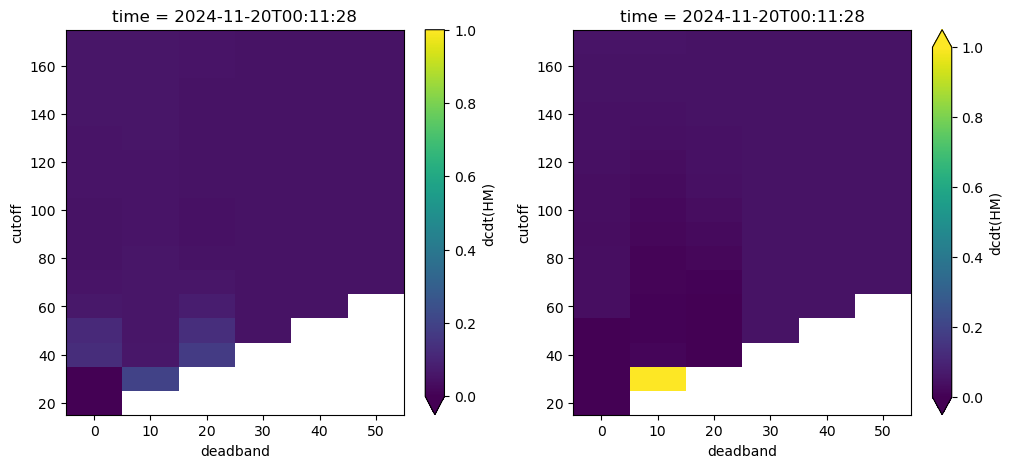

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ds.isel(time=1)['dcdt(HM)'].plot(vmin=0, vmax=1, ax=ax[0])
dsMC.isel(time=1)['dcdt(HM)'].median(dim='MC').plot(vmin=0, vmax=1, ax=ax[1])

In [42]:
dsMC.isel(time=1, cutoff=5, deadband=3)['dcdt(linear)'].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

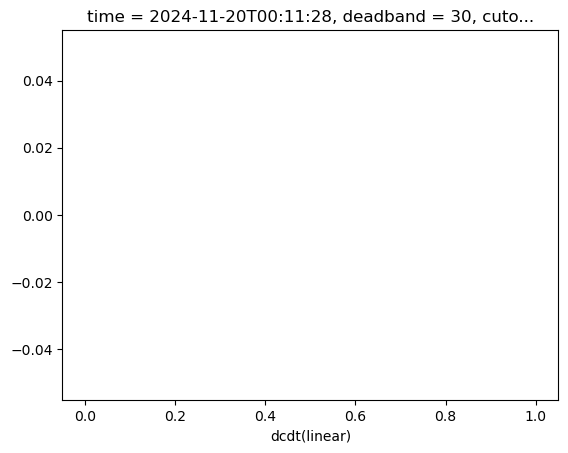

In [41]:
dsMC.isel(time=1, cutoff=5, deadband=3)['dcdt(linear)'].plot.hist()

In [37]:
expected_ds = xr.open_dataset('./output/expected_synthetic_data62_2024-11-20.nc')
expected_ds

<xarray.Dataset> Size: 365kB
Dimensions:       (time: 1620, cutoff: 16)
Coordinates:
  * time          (time) datetime64[ns] 13kB 2024-11-20T00:11:27 ... 2024-11-...
  * cutoff        (cutoff) int32 64B 20 30 40 50 60 70 ... 130 140 150 160 170
Data variables: (12/13)
    dcdt(HM)      (time, cutoff) float64 207kB ...
    deadband      (time) int64 13kB ...
    d_intensity   (time) int64 13kB ...
    d_startpoint  (time) int64 13kB ...
    add_noise     (time) bool 2kB ...
    c0            (time) int64 13kB ...
    ...            ...
    cs            (time) float64 13kB ...
    pressure      (time) float64 13kB ...
    temperature   (time) float64 13kB ...
    humidity      (time) float64 13kB ...
    area          (time) float64 13kB ...
    volume        (time) float64 13kB ...

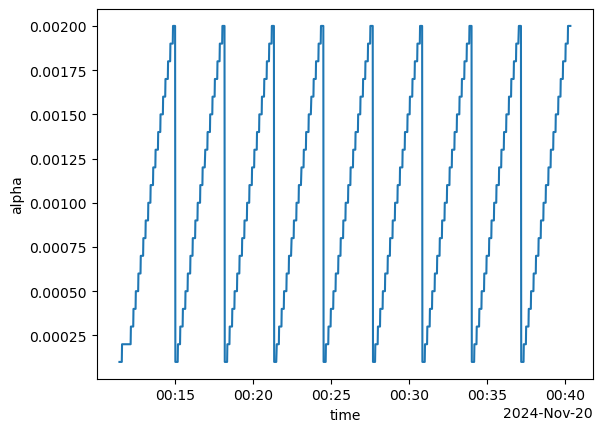

In [38]:
expected_ds['alpha'].plot()

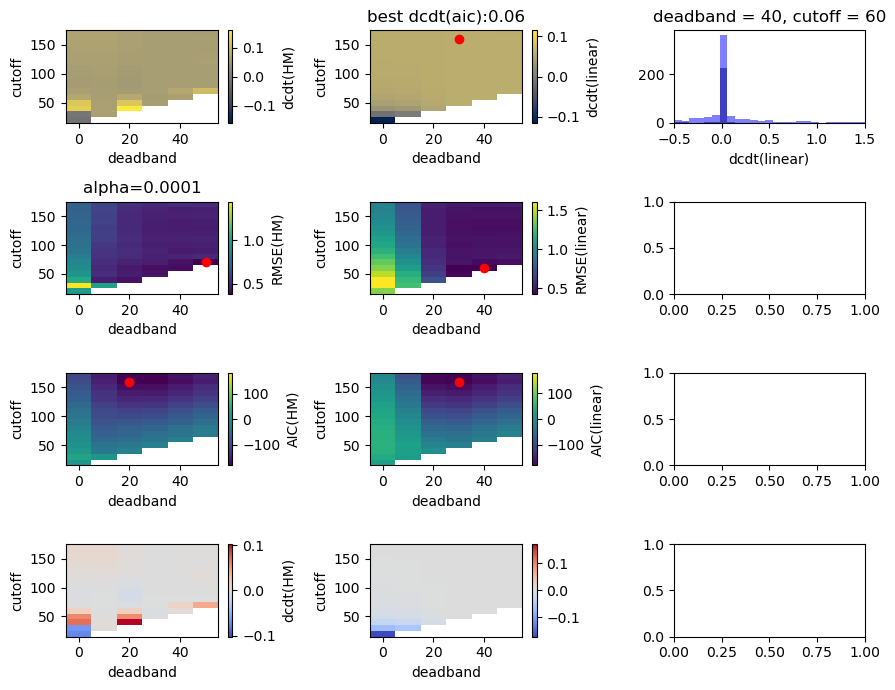

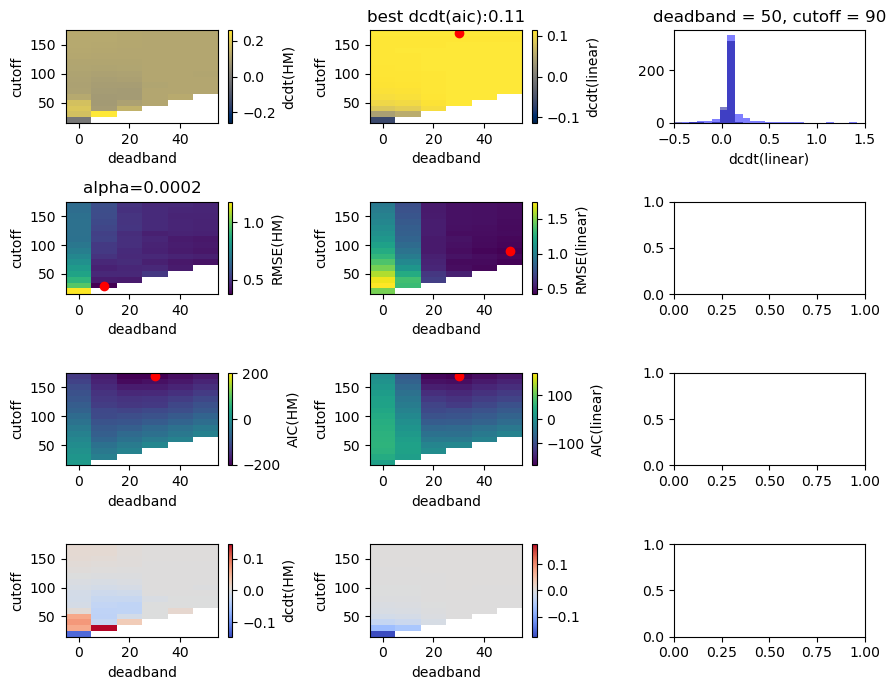

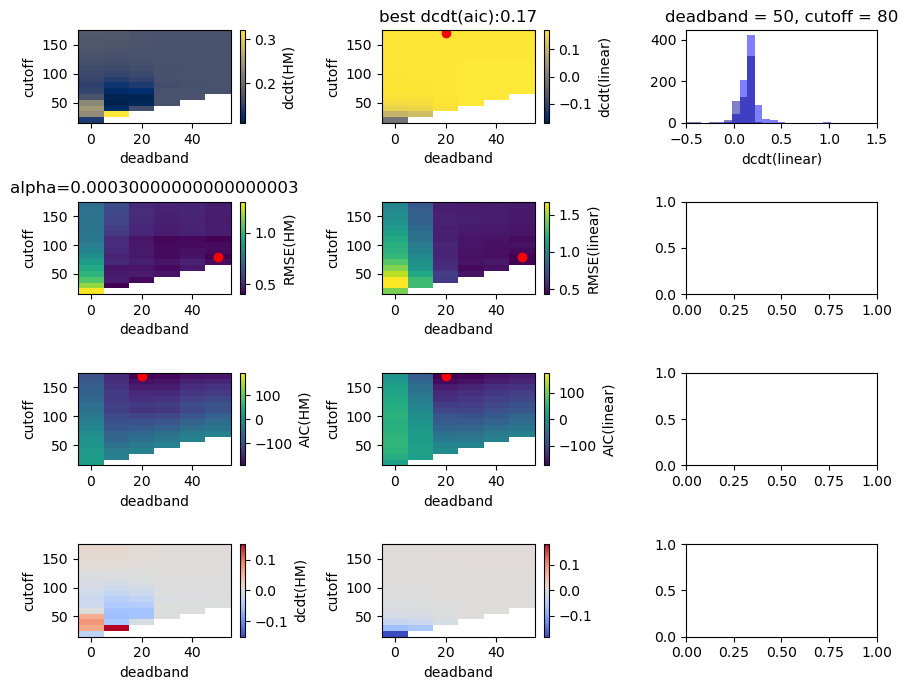

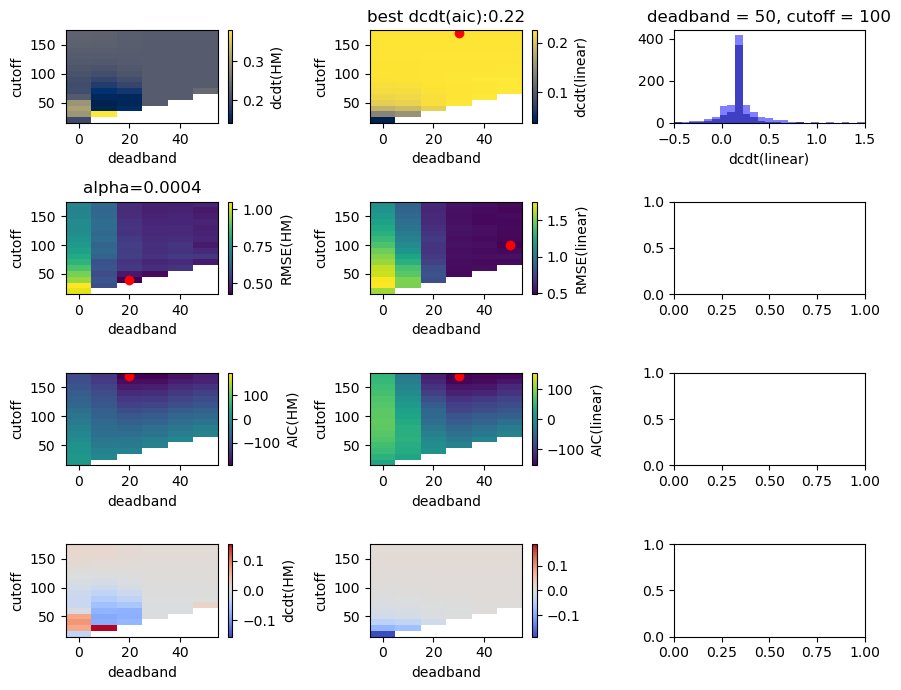

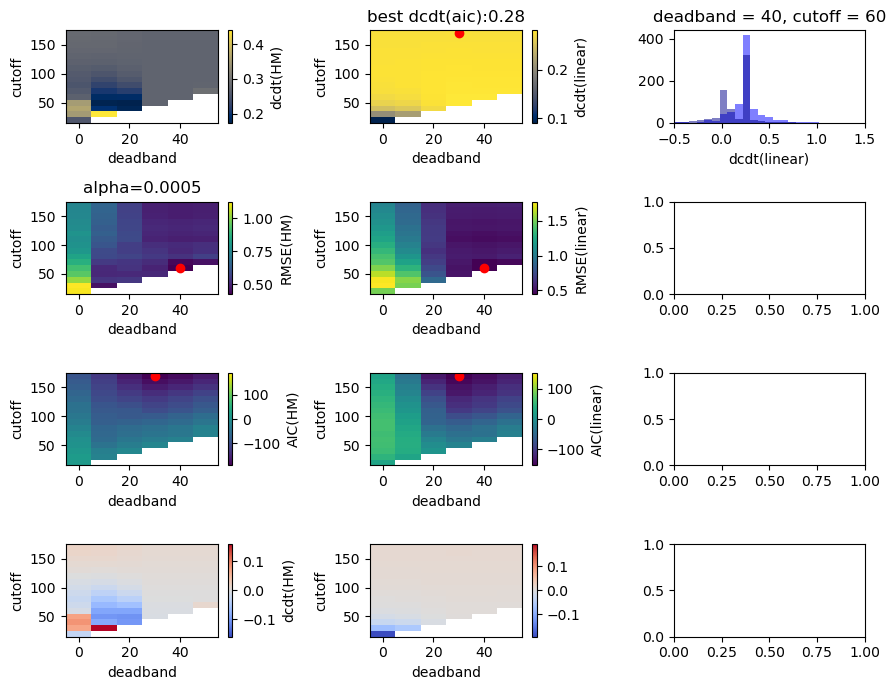

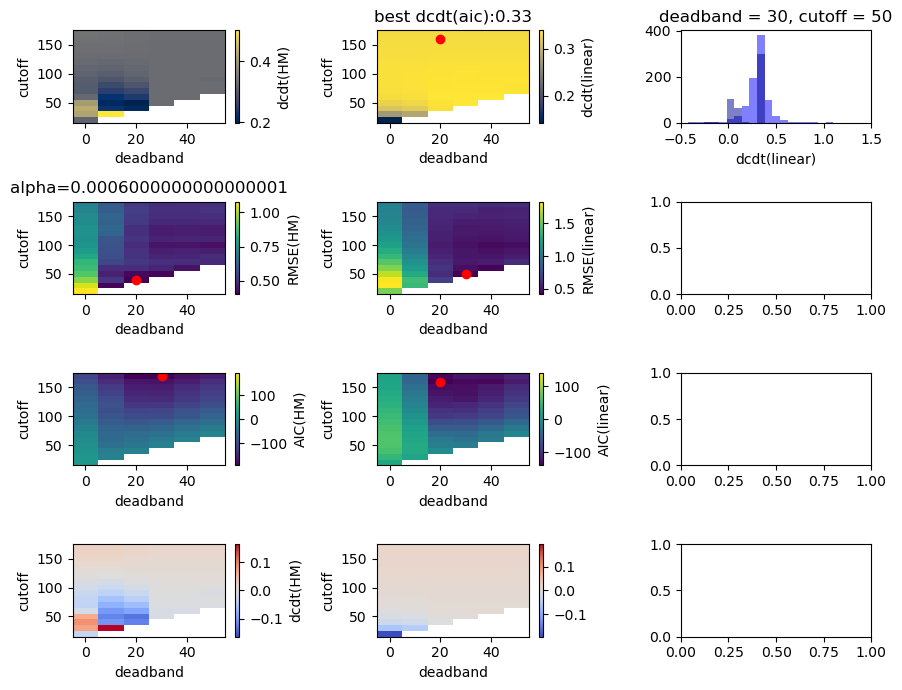

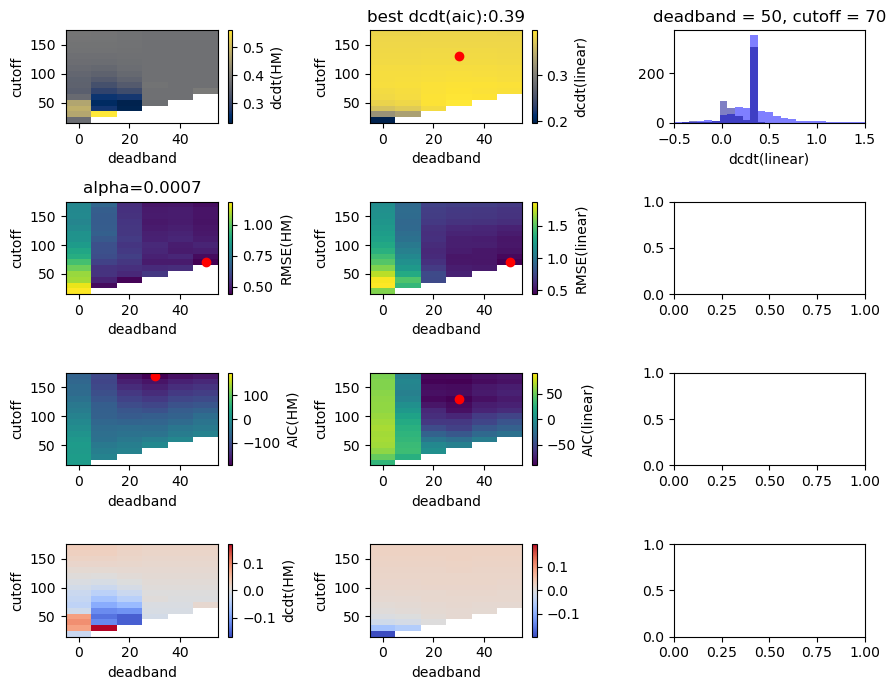

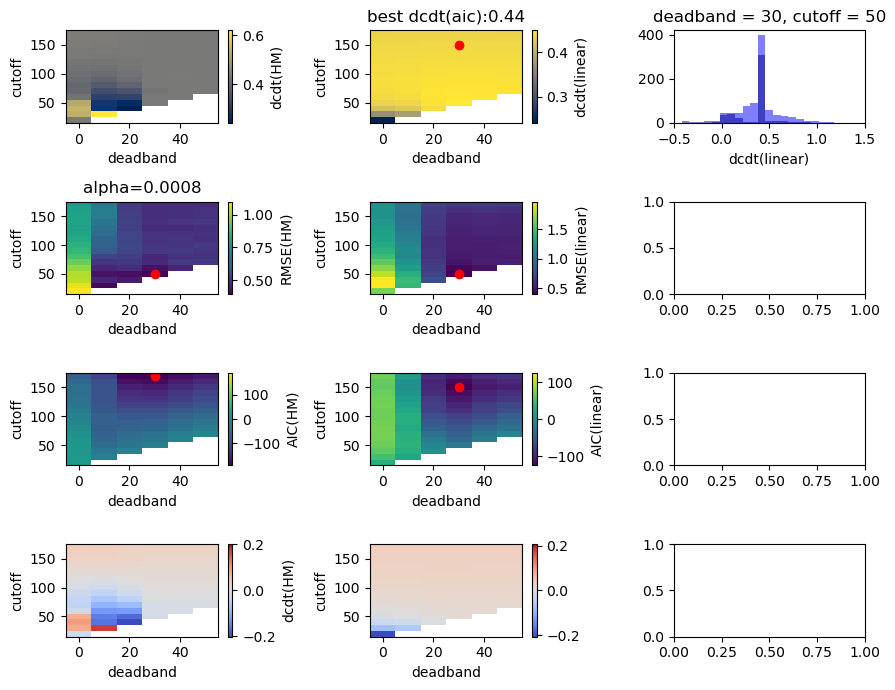

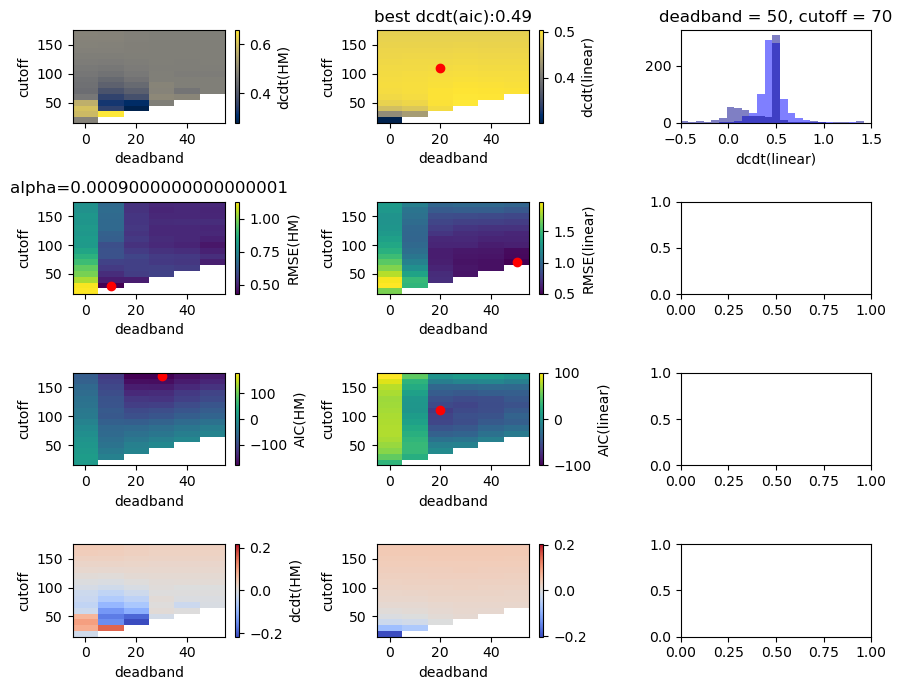

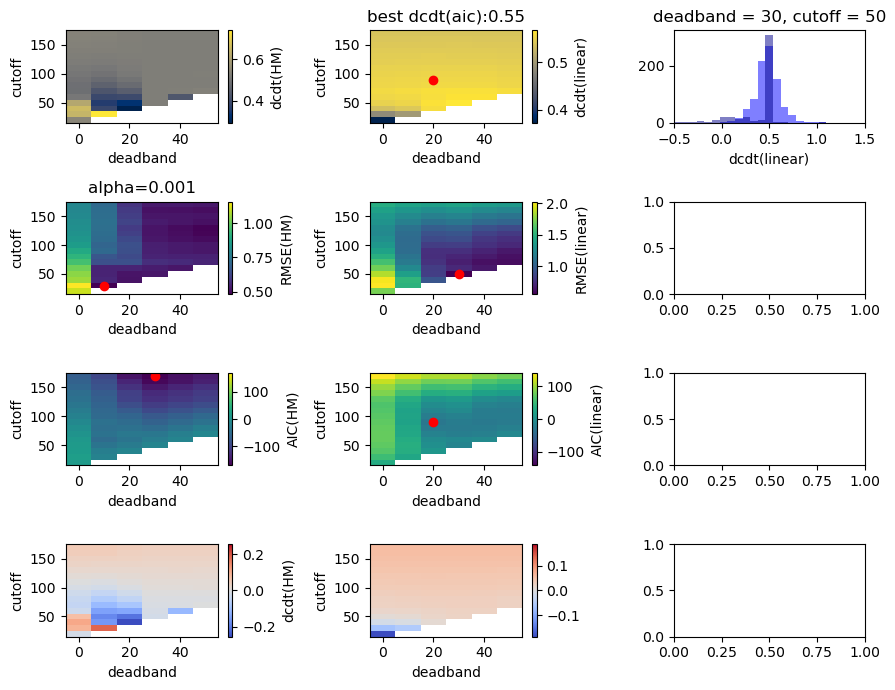

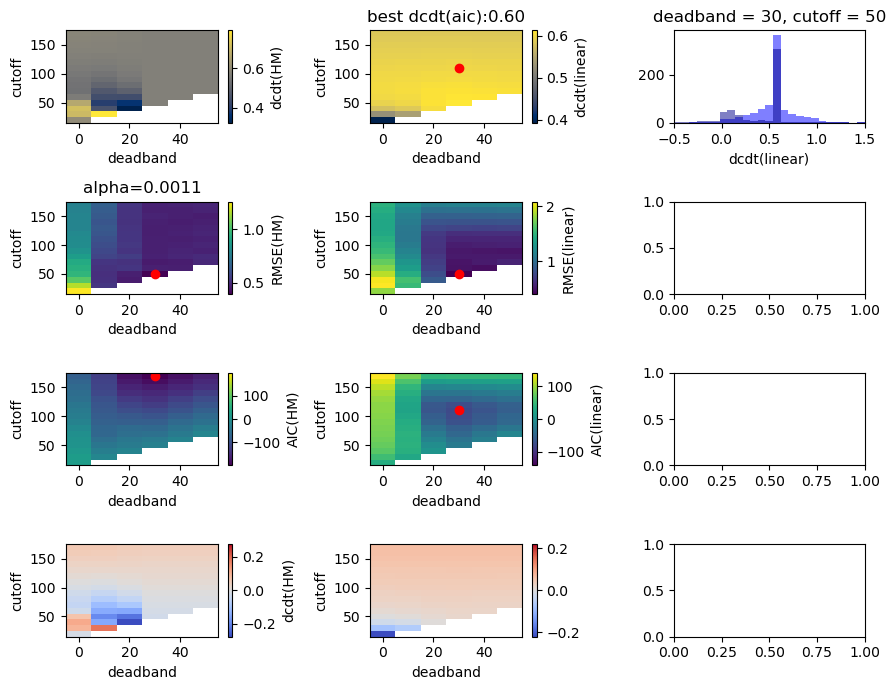

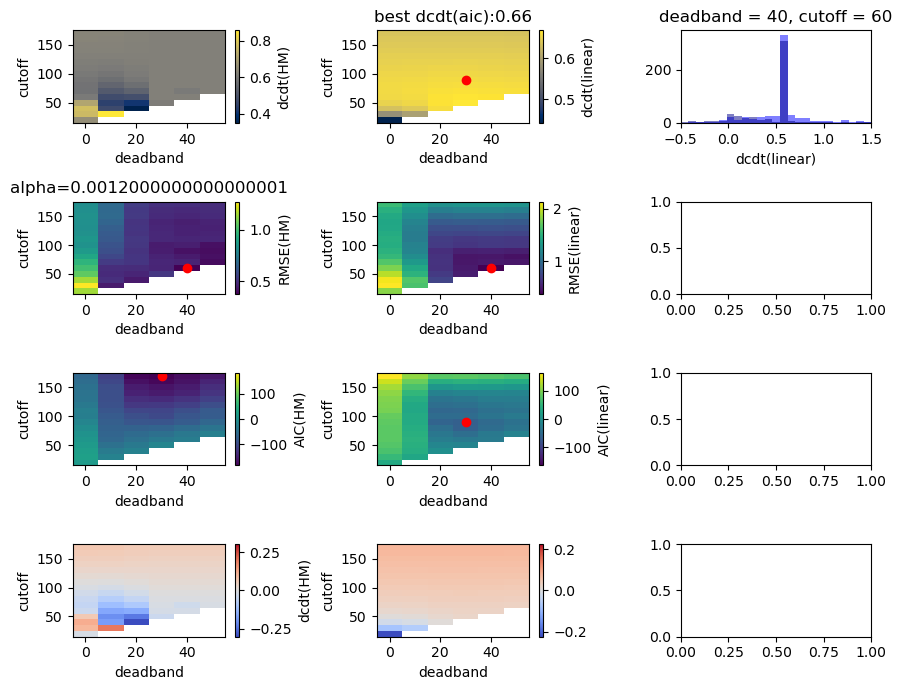

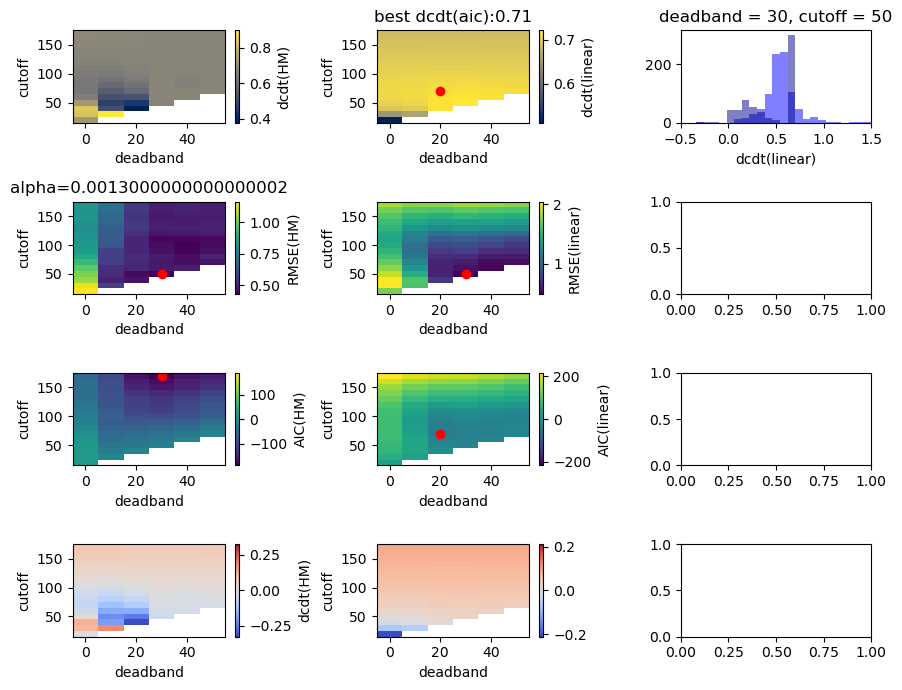

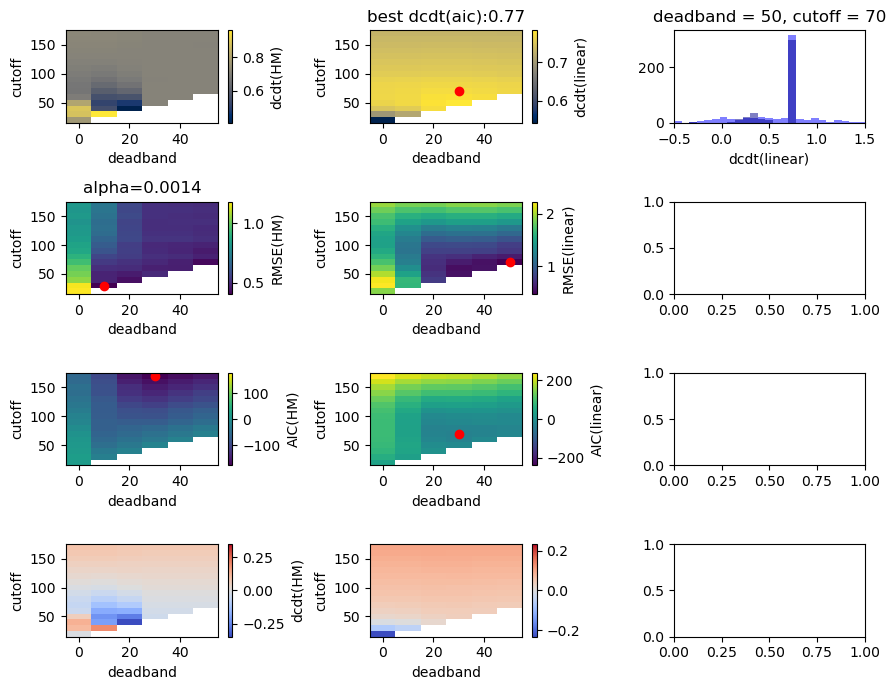

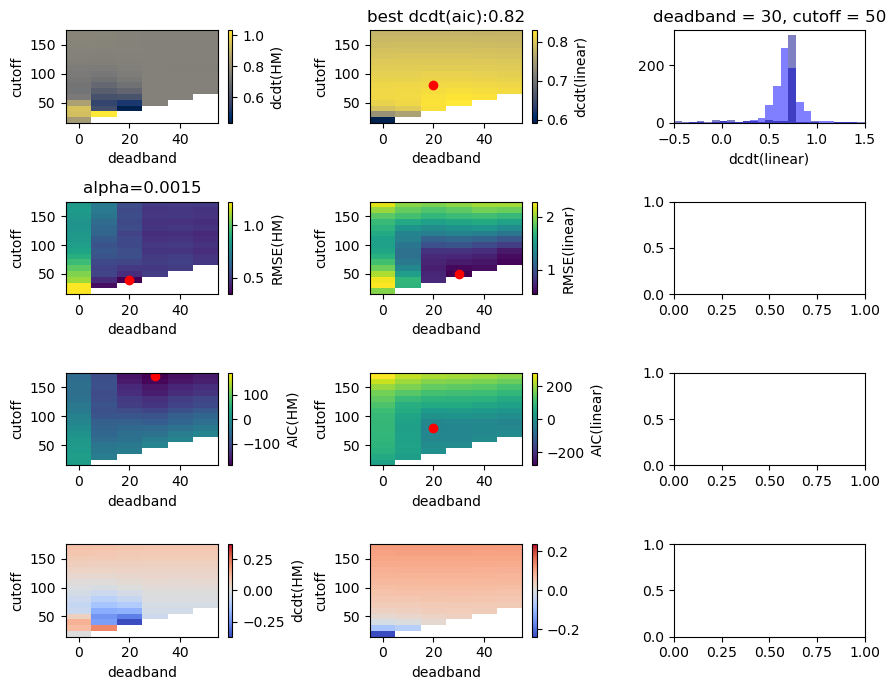

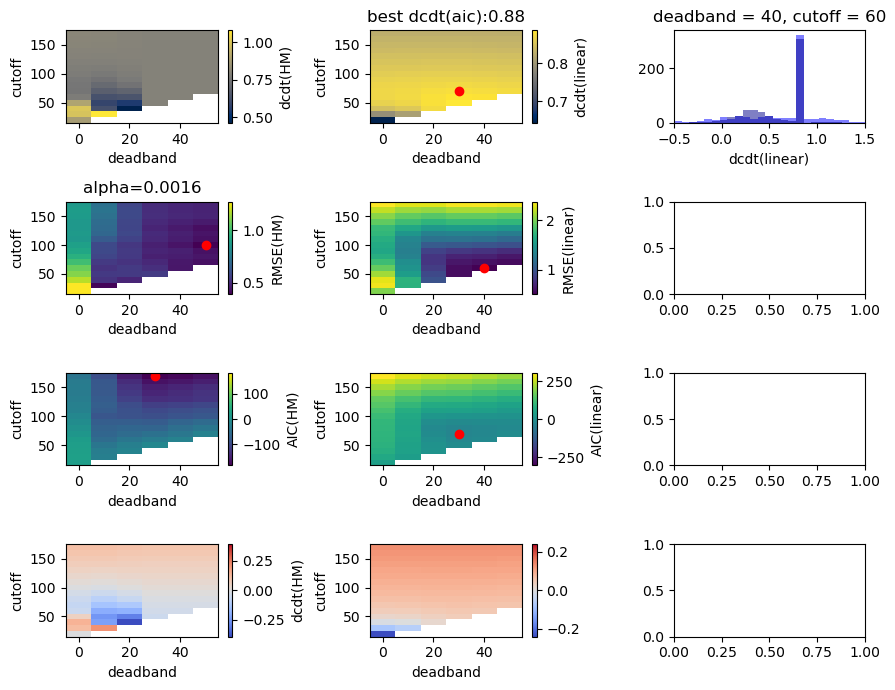

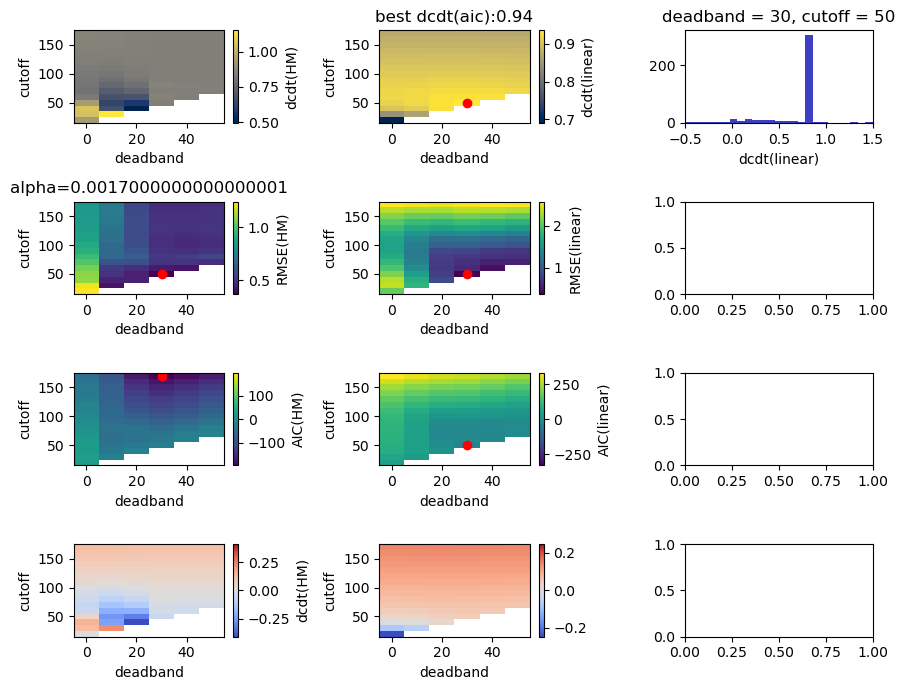

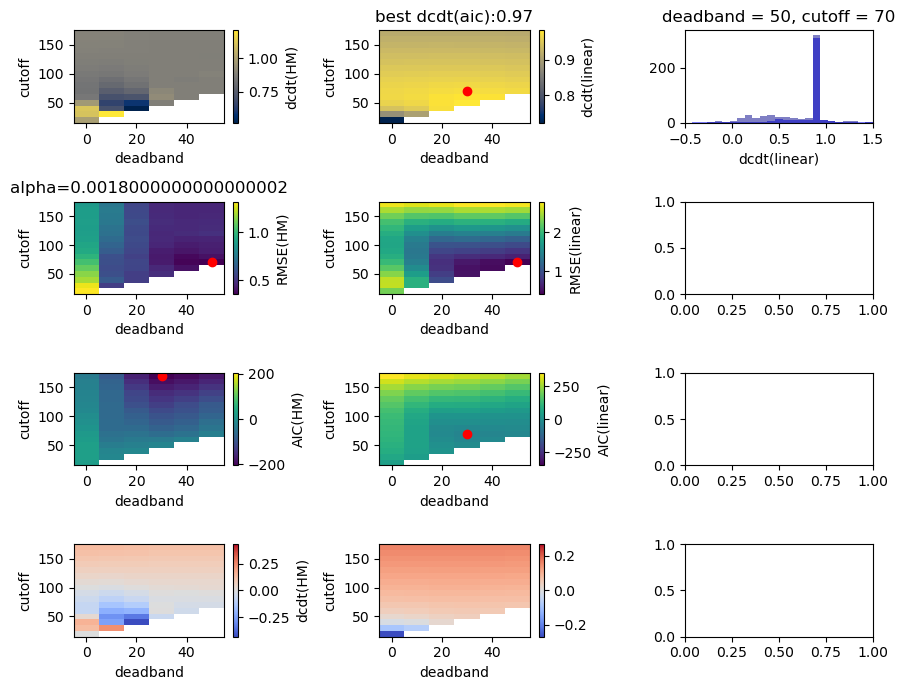

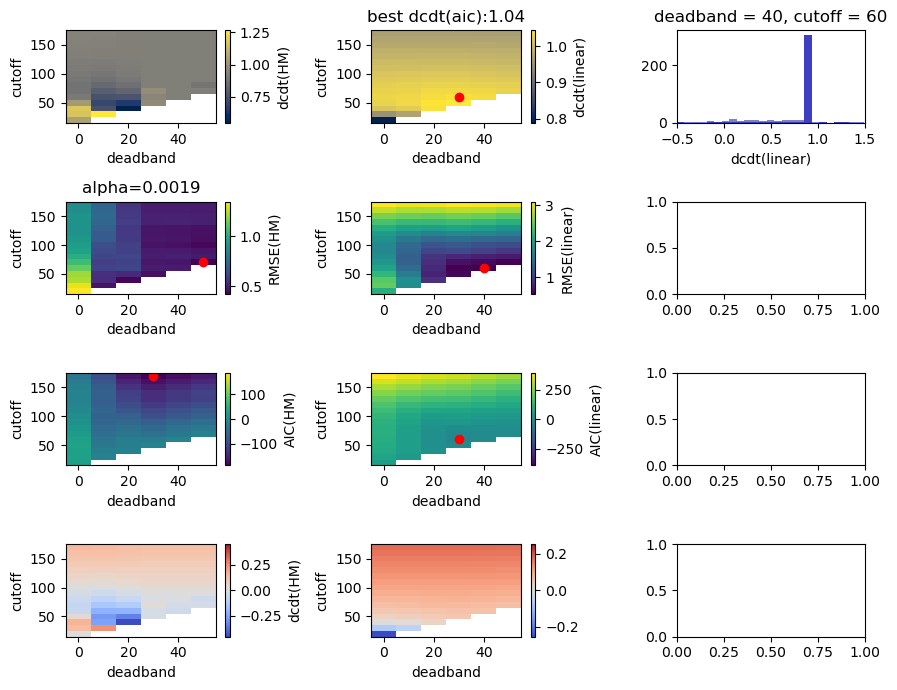

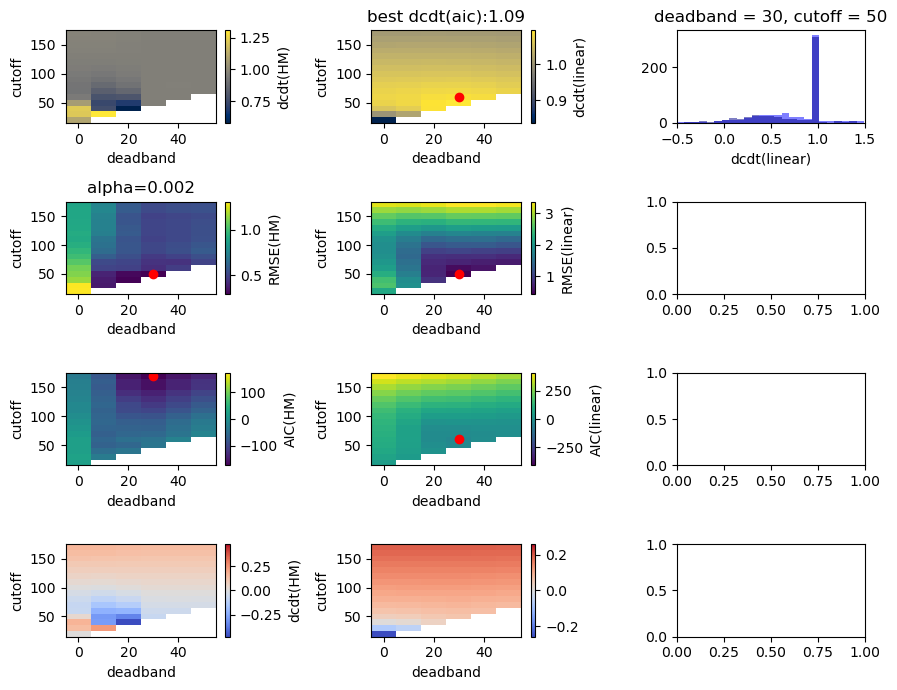

In [40]:
for alpha in np.unique(expected_ds['alpha'].values):
    # print(d_startpoint)
    # d_startpoint = 20

    fig, ax = plt.subplots(4,3, figsize=(9,7))
    
    time_selection = expected_ds.where((expected_ds['alpha'] == alpha)&(expected_ds['d_startpoint']==150), drop=True).time
    cutoff_coords, deadband_coords = ds.coords['cutoff'], ds.coords['deadband']

    ds.sel(time=time_selection)['dcdt(HM)'].median(dim=['time']).plot(ax=ax[0,0], cmap='cividis')
    ds.sel(time=time_selection)['dcdt(linear)'].median(dim=['time']).plot(ax=ax[0,1], cmap='cividis')


    ds.sel(time=time_selection)['RMSE(HM)'].median(dim=['time']).plot(ax=ax[1,0], cmap='viridis')
    ds.sel(time=time_selection)['RMSE(linear)'].median(dim=['time']).plot(ax=ax[1,1], cmap='viridis')

    ds.sel(time=time_selection)['AIC(HM)'].median(dim=['time']).plot(ax=ax[2,0], cmap='viridis')
    ds.sel(time=time_selection)['AIC(linear)'].median(dim=['time']).plot(ax=ax[2,1], cmap='viridis')

    # ax[2,0].scatter(ds.sel(time=time_selection)['AIC(HM)'].argmin(dim=['time']), ds.sel(time=time_selection)['AIC(HM)'].min(dim=['time']), color='red')
    # ax[2,0].scatter(20,100, color='red')
    
    aic_argmin_HM = ds.sel(time=time_selection)['AIC(HM)'].median(dim=['time']).argmin(dim=['cutoff', 'deadband'])
    aic_argmin_linear = ds.sel(time=time_selection)['AIC(linear)'].median(dim=['time']).argmin(dim=['cutoff', 'deadband'])

    rmse_argmin_HM = ds.sel(time=time_selection)['RMSE(HM)'].median(dim=['time']).argmin(dim=['cutoff', 'deadband'])
    rmse_argmin_linear = ds.sel(time=time_selection)['RMSE(linear)'].median(dim=['time']).argmin(dim=['cutoff', 'deadband'])

    

    ax[2,0].scatter(deadband_coords[aic_argmin_HM['deadband']], 
                    cutoff_coords[aic_argmin_HM['cutoff']], color='red')
    ax[2,1].scatter(deadband_coords[aic_argmin_linear['deadband']],
                    cutoff_coords[aic_argmin_linear['cutoff']], color='red')
    
    ax[1,0].scatter(deadband_coords[rmse_argmin_HM['deadband']],
                    cutoff_coords[rmse_argmin_HM['cutoff']], color='red')
    ax[1,1].scatter(deadband_coords[rmse_argmin_linear['deadband']],
                    cutoff_coords[rmse_argmin_linear['cutoff']], color='red')


    (ds.sel(time=time_selection)['dcdt(HM)']-expected_ds.sel(time=time_selection)['dcdt(HM)']).median(dim=['time']).plot(ax=ax[3,0], cmap='coolwarm')
    (ds.sel(time=time_selection)['dcdt(linear)']-expected_ds.sel(time=time_selection)['dcdt(HM)']).median(dim=['time']).plot(ax=ax[3,1], cmap='coolwarm')

    ax[0,1].scatter(deadband_coords[aic_argmin_linear['deadband']],
                    cutoff_coords[aic_argmin_linear['cutoff']], color='red')
    
    
    dcdt_linear_minAIC = ds.sel(time=time_selection, 
                                deadband=deadband_coords[aic_argmin_linear['deadband']],
                                cutoff=cutoff_coords[aic_argmin_linear['cutoff']])['dcdt(linear)'].median(dim=['time']).values
    
    ax[0,1].set_title(f'best dcdt(aic):{dcdt_linear_minAIC:.2f}')


    ax[1,0].set_title(f'alpha={alpha}')

    dsMC.sel(time=time_selection,
             deadband=deadband_coords[aic_argmin_linear['deadband']],
             cutoff=cutoff_coords[aic_argmin_linear['cutoff']])['dcdt(HM)'].plot.hist(range=(-0.5, 1.5), bins=25,ax=ax[0,2], alpha=0.5, color='blue')

    dsMC.sel(time=time_selection,
             deadband=deadband_coords[rmse_argmin_linear['deadband']],
             cutoff=cutoff_coords[rmse_argmin_linear['cutoff']])['dcdt(HM)'].plot.hist(range=(-0.5, 1.5), bins=25,ax=ax[0,2], alpha=0.5, color='darkblue')
    ax[0,2].set_xlim(-0.5,1.5)

    dsMC.sel(time=time_selection,
             deadband=deadband_coords[aic_argmin_linear['deadband']],
             cutoff=cutoff_coords[aic_argmin_linear['cutoff']])['dcdt(linear)'].plot.hist(range=(-0.5, 1.5), bins=25,ax=ax[0,2], alpha=0.5, color='red')
    dsMC.sel(time=time_selection,
                deadband=deadband_coords[rmse_argmin_linear['deadband']],
                cutoff=cutoff_coords[rmse_argmin_linear['cutoff']])['dcdt(linear)'].plot.hist(range=(-0.5, 1.5), bins=25,ax=ax[0,2], alpha=0.5, color='darkred')



    fig.tight_layout()
    fig.show()
    # break